## ECE MINOR PROJECT

### Bakka Uday kiran
### P Chandrashekar
### K Siddhartha

In [1]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cv2
import scipy.integrate
from scipy.signal import hilbert

In [53]:
def add_noise(signal,sensitivity=1):
    n = sensitivity*np.random.normal(nMean, nSigma, len(signal))
    return signal+n
def amplifier(signal,amplificaion):
    return signal*amplification

In [2]:
# Amplitude_Modulation_class
class Amplitude_Modulation:
    def __init__(self,message_angular_freq=1,carrier_angular_freq=10,
                 message_amplitude=30,carrier_amplitude=50,
                 time_start=0,time_end=5,
                 message_phase=0,carrier_phase=0,
                 message_signal="sin",carrier_signal="sin",samplingFrequency=100):

        self.message_angular_freq=message_angular_freq
        self.carrier_angular_freq=carrier_angular_freq

        self.message_amplitude=message_amplitude
        self.carrier_amplitude=carrier_amplitude

        self.samplingFrequency=samplingFrequency

        self.time_start=time_start
        self.time_end=time_end
        self.time=np.arange(self.time_start,self.time_end,1/samplingFrequency)
        
        self.message_phase=message_phase
        self.carrier_phase=carrier_phase

        #creating message_signal
        if message_signal=="sin":

            self.message_signal=self.message_amplitude*np.sin((2*np.pi*self.message_angular_freq*self.time)+self.message_phase)

        elif message_signal=="cos":

            self.message_signal=self.message_amplitude*np.cos(2*np.pi*self.message_angular_freq*self.time+self.message_phase)
            
        elif message_signal=="tan":
            
            self.message_signal=self.message_amplitude*np.tan(2*np.pi*self.message_angular_freq*self.time+self.message_phase)

        else:

            print("INVALID MESSAGE SIGNAL *****ERROR*******")

            return

        #Creating carrier_signal
        if carrier_signal=="sin":
            
            self.carrier_signal=self.carrier_amplitude*np.sin(2*np.pi*self.carrier_angular_freq*self.time+self.carrier_phase)
            
        elif carrier_signal=="cos":
            
            self.carrier_signal=self.carrier_amplitude*np.cos(2*np.pi*self.carrier_angular_freq*self.time+self.carrier_phase)
            
        else:
            
            print("INVALID CARRIER SIGNAL *******ERROR******")
            
            return

        #Creating Amplitude modulated signal
        self.modulated_signal=None
        
    def get_modulated_signal(self):    
        
        return self.modulated_signal
    
    def get_carrier_signal(self):
        
        return self.carrier_signal
    
    def get_message_signal(self):
        
        return self.message_signal
    
    def get_time(self):
        
        return self.time
    
    def analog_multiplier(self):
#         image = cv2.imread(r'C:\Users\Uday sonu\Desktop\ACS_Minor_project\images\AM_analog_multiplier.jpg')
        image=cv2.imread(r"./images/AM_analog_multiplier.jpg")
        figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
        plt.axis("off")
        plt.imshow(image)
        plt.show()
        # message_signal is multiplied with carrier signal and
        # this output is added to the carrier signal hence we generated 
        # Amplitude modulated signal with analog multiplier method
        
        message_signal_X_carrier_siganl=self.carrier_signal*self.message_signal
        
        self.plot(self.time,message_signal_X_carrier_siganl,title="AFTER MULTIPLICATON (ANALOG MULTIPLIER STEP 1)")
        
        self.modulated_signal=self.carrier_signal+(1/self.carrier_amplitude)*message_signal_X_carrier_siganl
        
        self.plot(self.time,self.modulated_signal,title="AFTER SUMMATION (ANALOG MULTIPLIER STEP 2)")
        return self.modulated_signal
    
        
    def square_law_modulator(self,a=1,b=0.5,c=0.1,d=0.01):
        
        
        image=cv2.imread(r"./images/AM_square_law_modulator.jpg")
        figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
        plt.axis("off")
        plt.imshow(image)
        plt.show()
        
        #message signal and carrier signal are added
        Vin=self.message_signal+self.carrier_signal
        
        self.plot(self.time,Vin,title="AFTER SUMMATION OF MESSAGE AND CARRIER SIGNAL --(SQUARE LAW MODULATOR STEP 1)")
              
        ## after Vin passed through Non_linear Device
        ## here after passing through non linear device ouput looks like
        ## a*(m+c)^2+b*(m+c)^3+c*(m+c)^4........
        ## this contains so many range of frequencies since there are
        ## m*m , c*c , m*c 
        Vo=a*Vin+b*(Vin)*(Vin)+c*Vin*Vin*Vin+d*Vin*Vin*Vin*Vin
        
        
        self.plot(self.time,Vo,title="AFTER PASSING THROUGH NON LINEAR DEVICE(DIODE) --(SQUARE LAW MODULATOR STEP 2)")

        ## now passing Vo through band pass filter
        ## we filter out the frequencies which are not needed using Band Pass Filter
        
        Vo= a*self.carrier_signal*(1+(2*b/a)/(self.carrier_amplitude)*self.message_signal)
        
        self.modulated_signal=Vo
        
        self.plot(self.time,Vo,title="AFTER PASSING THROUGH BAND PASS FILTER --(SQUARE LAW MODULATOR STEP 3)")
        
        return Vo
        
    def plot(self,x_value,y_value,title="TITLE",x_value_2=None,y_value_2=None,
             x_label="_",y_label="_"):
        
        figure(num=None, figsize=(11, 3), dpi=80, facecolor='w', edgecolor='k')
        
        if x_value_2==None and y_value_2==None:
            
            plt.plot(x_value,y_value,c=np.random.rand(3,))
            
            plt.title(title,size=15)
            
            plt.xlabel(x_label,size=13)
            
            plt.ylabel(y_label,size=13)
            
            plt.show()
        else:
            plt.plot(x_value,y_value,color="pink")
            
            plt.plot(x_value_2,y_value_2,color="b")
            
            plt.show()
            
    #funcion to perform the fourier of the given signal
    def fourier_trainsfrom(self,signal):
        amplitude=signal
        # Frequency domain representation
        samplingFrequency=self.samplingFrequency
        
        fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

        fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

        tpCount     = len(amplitude)

        values      = np.arange(int(tpCount/2))

        timePeriod  = tpCount/samplingFrequency

        frequencies = values/timePeriod

        # Frequency domain representation

        self.plot(frequencies, abs(fourierTransform),title="Frequency Domain Representation")

    def dsbsc(self):
        return self.carrier_signal*self.message_signal/(self.carrier_amplitude)
    
    def ssbsc_lower(self):
        return self.message_amplitude*np.sin(2*np.pi*self.carrier_angular_freq*self.time-2*(np.pi)
                      *self.message_angular_freq*self.time)

    def ssbsc_upper(self):
        return self.message_amplitude*np.sin(2*np.pi*self.carrier_angular_freq*self.time+2*(np.pi)
                      *self.message_angular_freq*self.time)
    
    def phase_shift_method(self,angle_oscillator=np.pi/2,angle_message=np.pi/2,upper=True):
        
        image=cv2.imread(r"./images/AM_phase_shift_method.jpg")
        figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
        plt.axis("off")
        plt.imshow(image)
        plt.show()
        
        #plotting input message signal()
        message_without_90=self.message_amplitude*np.sin((2*np.pi*self.message_angular_freq*self.time)+self.message_phase)
        self.plot(self.get_time(),message_without_90,title="Input message signal without phase shift")
        
        
        #plotting input message signal after phase shift
        message_with_90=self.message_amplitude*np.sin((2*np.pi*self.message_angular_freq*self.time)+angle_message)
        self.plot(self.get_time(),message_with_90,title="Message signal with phase shift")
        
        
        #carrier generated by oscillator
        carrier_without_90= self.carrier_signal=self.carrier_amplitude*np.sin(2*np.pi*self.carrier_angular_freq*self.time+self.carrier_phase)
        self.plot(self.get_time(),carrier_without_90,title="Carrier signal without phase shift")
        
        #carrier with 90 degree phase shift
        carrier_with_90=self.carrier_signal=self.carrier_amplitude*np.sin(2*np.pi*self.carrier_angular_freq*self.time+angle_oscillator)
        self.plot(self.get_time(),carrier_with_90,title="Carrier signal with Phase shift")
        
        
        # OUTPUT of balance modulator BM1
        product_mod_m1=message_without_90*carrier_with_90
        self.plot(self.get_time(),product_mod_m1,title="OUTPUT of Balanced Modulator BM1")
        
        #OUTPUT of balance modulator BM2
        product_mod_m2=message_with_90*carrier_without_90
        self.plot(self.get_time(),product_mod_m2,title="OUTPUT of Balanced Modulator BM2")
        
        adder1=product_mod_m1-product_mod_m2
        adder2=product_mod_m1+product_mod_m2
        if upper==True:
            self.plot(self.get_time(),adder2,title="Suppressed Carrier and Lower sideband")
            return adder2
        else:
            self.plot(self.get_time(),adder1,title="Suppressed Carrier and Upper sideband")
            return adder1
        ac.fourier_trainsfrom(adder)

#         self.plot(self.get_time(),adder,title="helo")


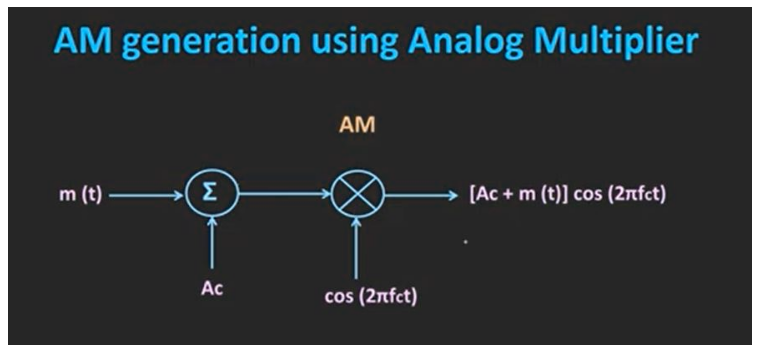

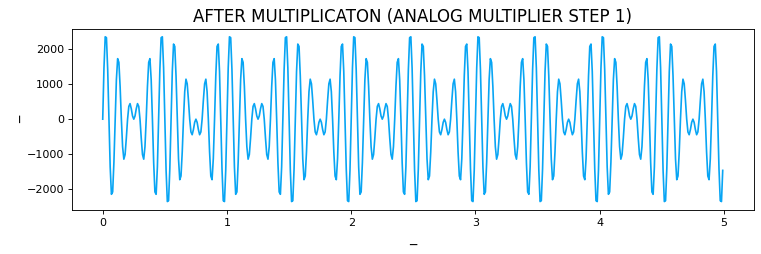

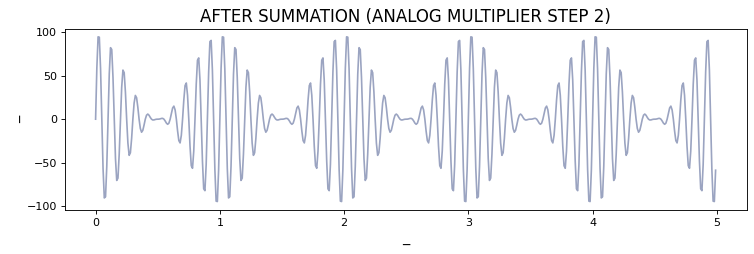

In [8]:
ac=Amplitude_Modulation(message_angular_freq=1,carrier_angular_freq=10,
                 message_amplitude=50,carrier_amplitude=50,
                 time_start=0,time_end=5,
                 message_phase=0,carrier_phase=0,
                 message_signal="cos",carrier_signal="sin",samplingFrequency=100)
am_using_multiplier=ac.analog_multiplier()

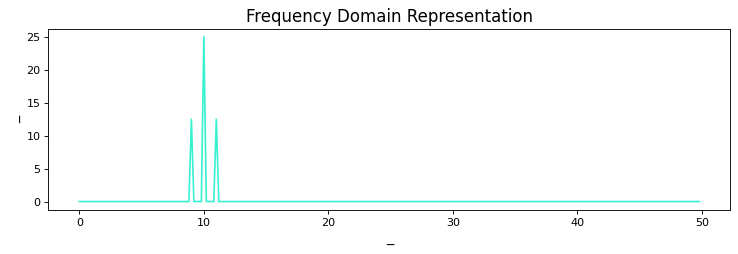

In [9]:
ac.fourier_trainsfrom(am_using_multiplier)

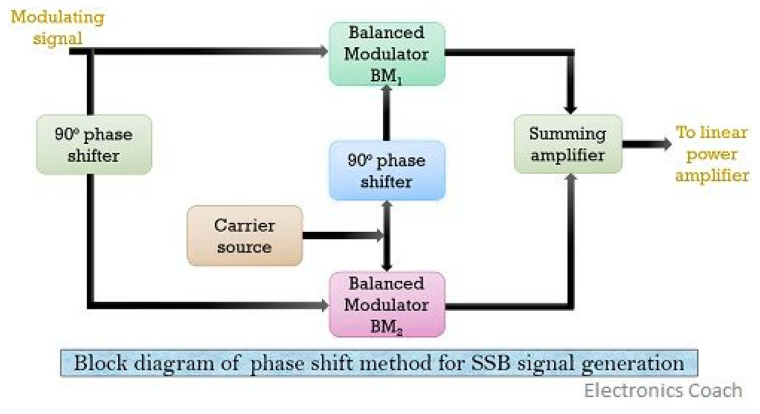

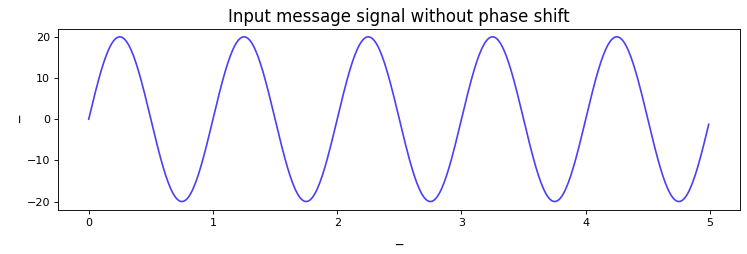

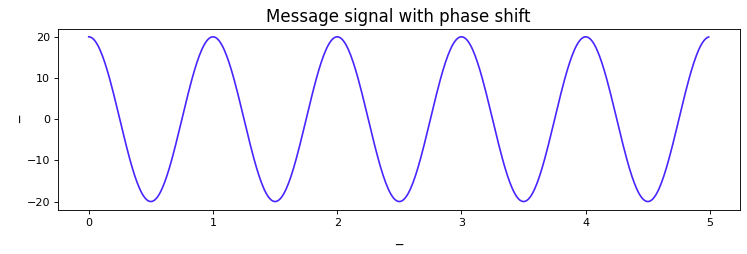

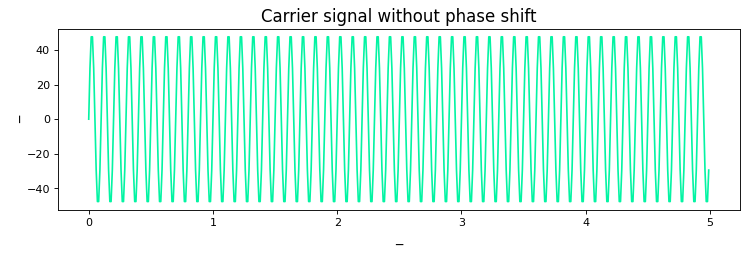

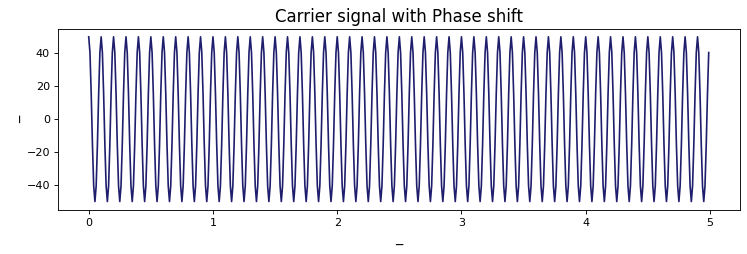

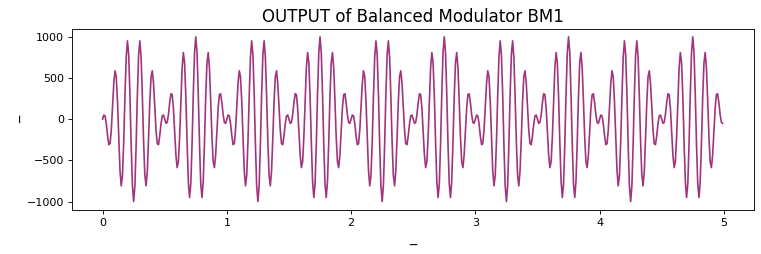

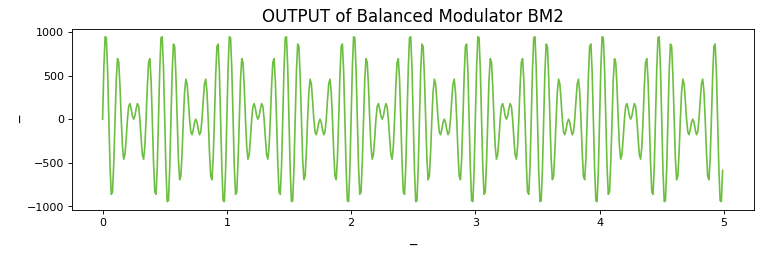

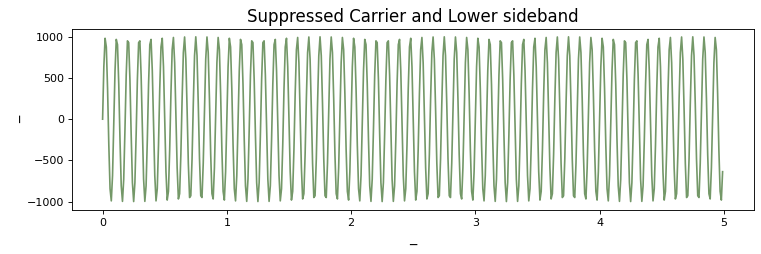

In [21]:
# used in generating single sideband suppressed carrier
ac=Amplitude_Modulation(message_angular_freq=1,carrier_angular_freq=10,
                 message_amplitude=20,carrier_amplitude=50,
                 time_start=0,time_end=5,
                 message_phase=0,carrier_phase=0,
                 message_signal="cos",carrier_signal="sin",samplingFrequency=100)

am_using_phase_shift_method=ac.phase_shift_method(angle_oscillator=np.pi/2,upper=True)

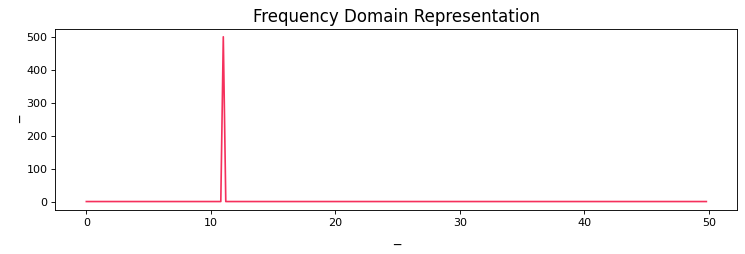

In [22]:
ac.fourier_trainsfrom(am_using_phase_shift_method)

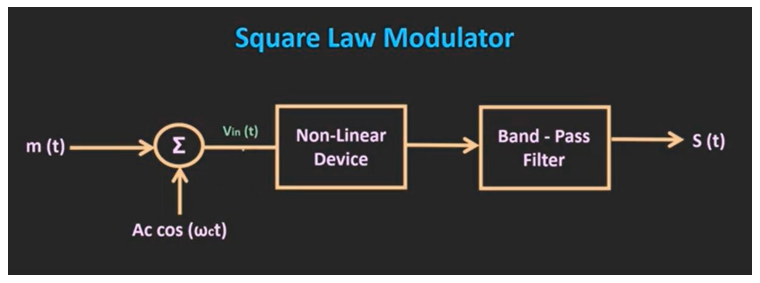

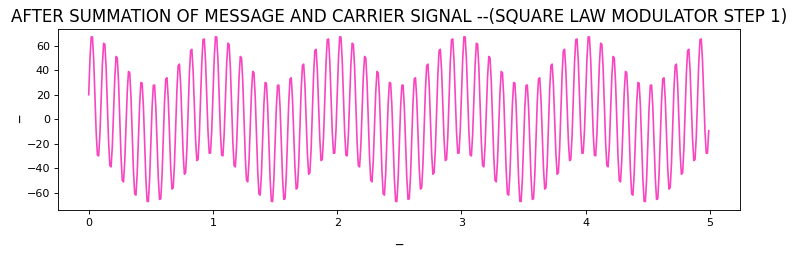

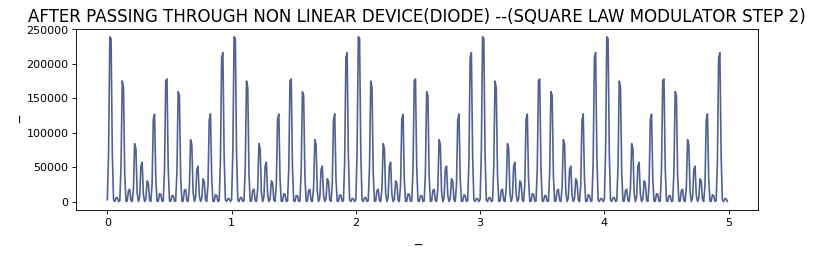

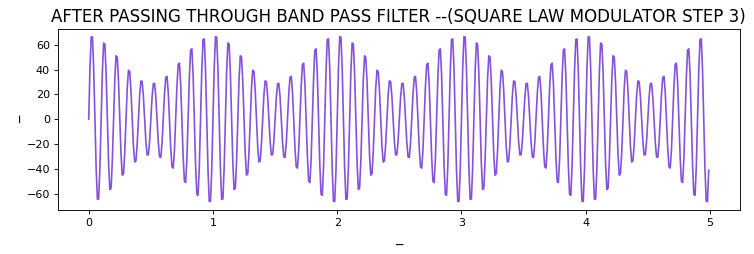

In [18]:
ac=Amplitude_Modulation(message_angular_freq=1,carrier_angular_freq=10,
                 message_amplitude=20,carrier_amplitude=50,
                 time_start=0,time_end=5,
                 message_phase=0,carrier_phase=0,
                 message_signal="cos",carrier_signal="sin",samplingFrequency=100)
am_using_square_law_modulator=ac.square_law_modulator(a=1,b=0.5,c=0.1,d=0.01)

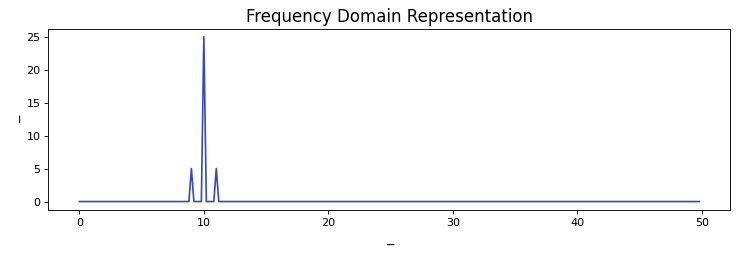

In [23]:
ac.fourier_trainsfrom(am_using_square_law_modulator)

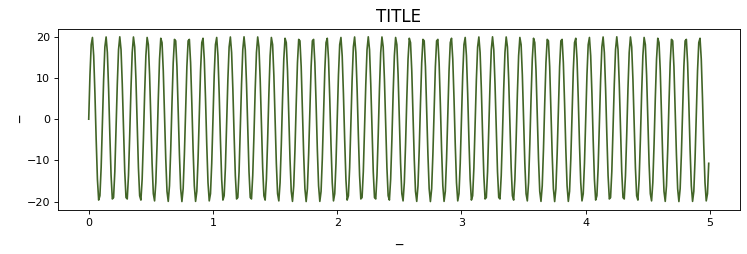

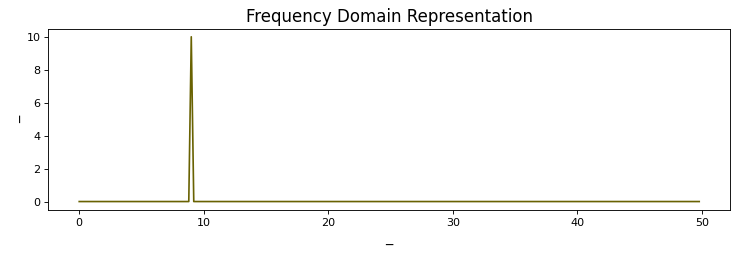

In [24]:
am_ssb_lower_signal=ac.ssbsc_lower()
ac.plot(ac.get_time(),am_ssb_lower_signal)
ac.fourier_trainsfrom(am_ssb_lower_signal)

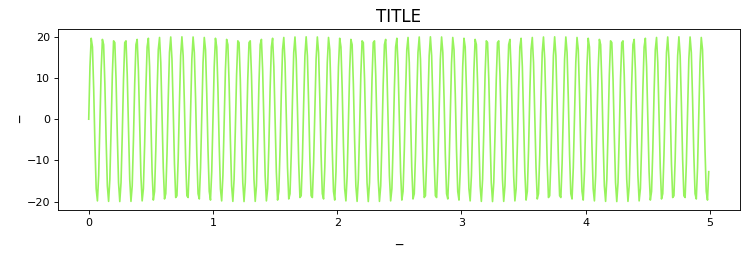

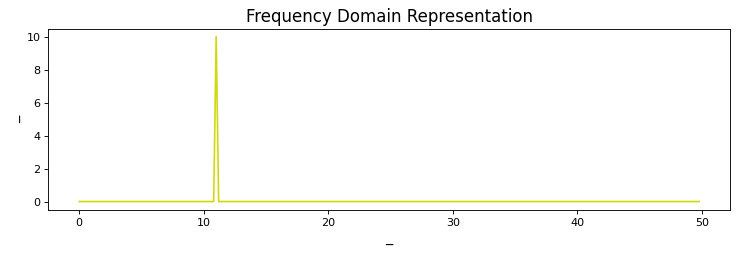

In [25]:
am_ssb_upper_signal=ac.ssbsc_upper()
ac.plot(ac.get_time(),am_ssb_upper_signal)
ac.fourier_trainsfrom(am_ssb_upper_signal)

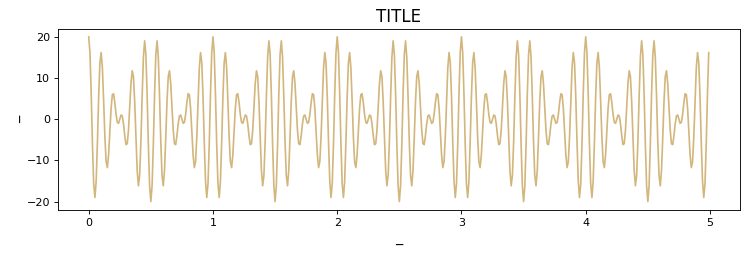

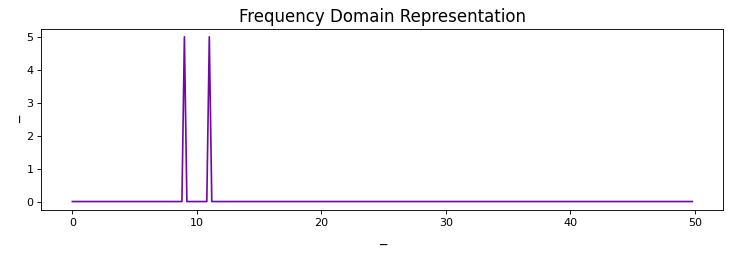

In [26]:
am_dsbsc=ac.dsbsc()
ac.plot(ac.get_time(),am_dsbsc)
ac.fourier_trainsfrom(am_dsbsc)

In [123]:
class Frequency_Modulation:
        def __init__(self,message_angular_freq=2,carrier_angular_freq=30,
            message_amplitude=20,carrier_amplitude=100,
            time_start=0,time_end=5,
            message_phase=0,carrier_phase=0,
            message_signal="sin",carrier_signal="sin",samplingFrequency=100,kf=0.18):

            self.message_angular_freq=message_angular_freq
            self.carrier_angular_freq=carrier_angular_freq

            self.message_amplitude=message_amplitude
            self.carrier_amplitude=carrier_amplitude

            self.samplingFrequency=samplingFrequency

            self.time_start=time_start
            self.time_end=time_end
            self.time=np.arange(self.time_start,self.time_end,1/samplingFrequency)

            self.message_phase=message_phase
            self.carrier_phase=carrier_phase

            if message_signal=="cos":
                self.ms='cos'
                self.message_signal_integrated=self.message_amplitude*np.sin((2*np.pi*self.message_angular_freq*self.time)+self.message_phase)

            elif message_signal=="sin":
                self.ms='sin'
                self.message_signal_integrated=-1*self.message_amplitude*np.cos(2*np.pi*self.message_angular_freq*self.time+self.message_phase)

            elif message_signal=="tan":

                self.message_signal=self.message_amplitude*np.tan(2*np.pi*self.message_angular_freq*self.time+self.message_phase)

            else:

                print("INVALID MESSAGE SIGNAL *****ERROR*******       ")

                return

            if message_signal=="sin":
               
                self.message_signal=self.message_amplitude*np.sin((2*np.pi*self.message_angular_freq*self.time)+self.message_phase)

            elif message_signal=="cos":
              
                self.message_signal=self.message_amplitude*np.cos(2*np.pi*self.message_angular_freq*self.time+self.message_phase)

            elif message_signal=="tan":

                self.message_signal=self.message_amplitude*np.tan(2*np.pi*self.message_angular_freq*self.time+self.message_phase)

            else:

                print("INVALID MESSAGE SIGNAL *****ERROR*******       ")

                return

                    #Creating carrier_signal
            if carrier_signal=="sin":
                self.cs='sin'
                self.carrier_signal=self.carrier_amplitude*np.sin(2*np.pi*self.carrier_angular_freq*self.time+self.carrier_phase)

            elif carrier_signal=="cos":
                self.cs='cos'
                self.carrier_signal=self.carrier_amplitude*np.cos(2*np.pi*self.carrier_angular_freq*self.time+self.carrier_phase)

            else:

                print("INVALID CARRIER SIGNAL *******ERROR******")

                return

            if carrier_signal=="sin":
                self.modulated_signal=self.carrier_amplitude*np.sin(2*np.pi*carrier_angular_freq*self.time+self.carrier_phase+2*np.pi*kf*self.message_signal/(2*np.pi*self.message_angular_freq))
            elif carrier_signal=="cos":
                self.modulated_signal=self.carrier_amplitude*np.cos(2*np.pi*carrier_angular_freq*self.time+self.carrier_phase+2*np.pi*kf*self.message_signal/(2*np.pi*self.message_angular_freq))
            else:
                print("INVALID CARRIER SIGNAL *******ERROR******")
                return
 
        def plot(self,x_value,y_value,title="TITLE",x_value_2=None,y_value_2=None,x_label="_",y_label="_"):
        
            figure(num=None, figsize=(11, 3), dpi=80, facecolor='w', edgecolor='k')

            if x_value_2==None and y_value_2==None:

                plt.plot(x_value,y_value,c=np.random.rand(3,))

                plt.title(title,size=15)

                plt.xlabel(x_label,size=13)

                plt.ylabel(y_label,size=13)

                plt.show()
            else:
                plt.plot(x_value,y_value,color="pink")

                plt.plot(x_value_2,y_value_2,color="b")

                plt.show()

        def get_modulated_signal(self):    

            return self.modulated_signal

        def get_carrier_signal(self):

            return self.carrier_signal

        def get_message_signal(self):

            return self.message_signal

        def get_time(self):

            return self.time
        
        def direct_method(self,L=0.1,C=0.1,k=0.0055):
            image=cv2.imread(r"./images/fm_reactance_modulator.png")
            figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
            plt.axis("off")
            plt.imshow(image)
            plt.show()
        
            carrier_angular_freq=1/np.sqrt(L*C)
#             carrier_angular_freq=10
            kf=(k*carrier_angular_freq)/(2*C)  
#             kf=.275
            if self.ms=="sin":
                self.modulated_signal=self.carrier_amplitude*np.sin(2*np.pi*carrier_angular_freq*self.time+self.carrier_phase+2*np.pi*kf*self.message_signal_integrated/(2*np.pi*self.message_angular_freq))
            elif self.ms=="cos":
                self.modulated_signal=self.carrier_amplitude*np.cos(2*np.pi*carrier_angular_freq*self.time+self.carrier_phase-2*np.pi*kf*self.message_signal_integrated/(2*np.pi*self.message_angular_freq))
            else:
                print("INVALID CARRIER SIGNAL *******ERROR******")
                return

            self.plot(self.get_time(),self.modulated_signal)
            return self.modulated_signal            
            
            
        def fourier_trainsfrom(self,signal):
            
            amplitude=signal

            # Frequency domain representation
            samplingFrequency=self.samplingFrequency

            fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

            fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

            tpCount     = len(amplitude)

            values      = np.arange(int(tpCount/2))

            timePeriod  = tpCount/samplingFrequency

            frequencies = values/timePeriod

            # Frequency domain representation

            self.plot(frequencies, abs(fourierTransform),title="Frequency Domain Representation")

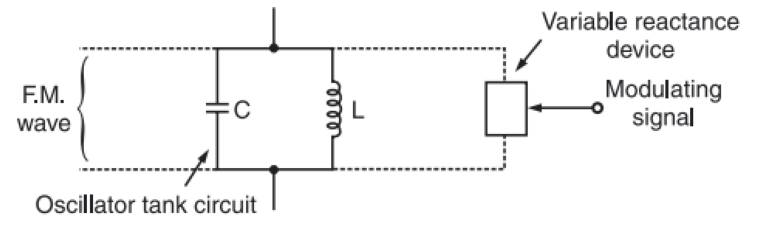

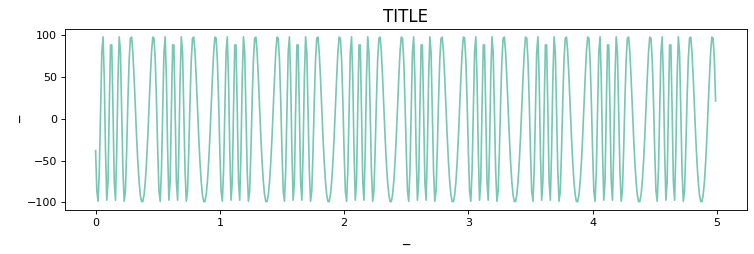

In [127]:
fc=Frequency_Modulation(message_signal="sin",carrier_signal="cos",carrier_angular_freq=1,time_end=5,kf=0.275)
fm_using_direct_method=fc.direct_method()

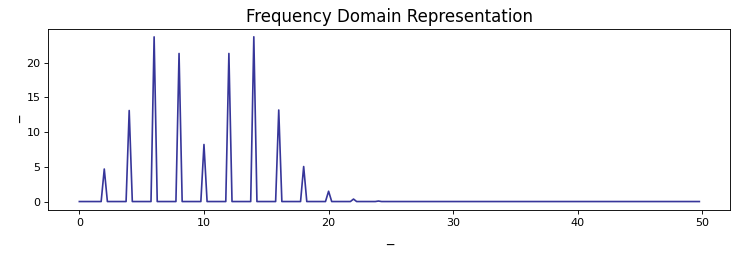

In [43]:
fc.fourier_trainsfrom(fm_using_direct_method)

In [47]:
class PhaseModulation:
    def __init__(self,message_angular_freq=1,carrier_angular_freq=10,
                 message_amplitude=20,carrier_amplitude=10,
                 time_start=0,time_end=5,
                 message_phase=0,carrier_phase=0,
                 message_signal="sin",carrier_signal="sin",samplingFrequency=100):

        self.message_angular_freq=message_angular_freq
        self.carrier_angular_freq=carrier_angular_freq

        self.message_amplitude=message_amplitude
        self.carrier_amplitude=carrier_amplitude

        self.samplingFrequency=samplingFrequency

        self.time_start=time_start
        self.time_end=time_end
        self.time=np.arange(self.time_start,self.time_end,1/samplingFrequency)
        
        self.message_phase=message_phase
        self.carrier_phase=carrier_phase

        #creating message_signal
        if message_signal=="sin":
            self.ms='sin'
            self.message_signal=self.message_amplitude*np.sin((2*np.pi*self.message_angular_freq*self.time)+self.message_phase)

        elif message_signal=="cos":
            self.ms='cos'
            self.message_signal=self.message_amplitude*np.cos(2*np.pi*self.message_angular_freq*self.time+self.message_phase)
            
        elif message_signal=="tan":
            
            self.message_signal=self.message_amplitude*np.tan(2*np.pi*self.message_angular_freq*self.time+self.message_phase)

        else:

            print("INVALID MESSAGE SIGNAL *****ERROR*******")

            return

        #Creating carrier_signal
        if carrier_signal=="sin":
            self.cs='sin'
            self.carrier_signal=self.carrier_amplitude*np.sin(2*np.pi*self.carrier_angular_freq*self.time+self.carrier_phase)
            
        elif carrier_signal=="cos":
            self.cs='cos'
            self.carrier_signal=self.carrier_amplitude*np.cos(2*np.pi*self.carrier_angular_freq*self.time+self.carrier_phase)
            
        else:
            
            print("INVALID CARRIER SIGNAL *******ERROR******")
            
            return

        #Creating Amplitude modulated signal
        self.modulated_signal=None
    def plot(self,x_value,y_value,title="TITLE",x_value_2=None,y_value_2=None,
            x_label="_",y_label="_"):
        
            figure(num=None, figsize=(11, 3), dpi=80, facecolor='w', edgecolor='k')

            if x_value_2==None and y_value_2==None:

                plt.plot(x_value,y_value,c=np.random.rand(3,))

                plt.title(title,size=15)

                plt.xlabel(x_label,size=13)

                plt.ylabel(y_label,size=13)

                plt.show()
            else:
                plt.plot(x_value,y_value,color="pink")

                plt.plot(x_value_2,y_value_2,color="b")

                plt.show()

    def get_modulated_signal(self):    

            return self.modulated_signal

    def get_carrier_signal(self):

            return self.carrier_signal

    def get_message_signal(self):

            return self.message_signal

    def get_time(self):

            return self.time
        
    def direct_method(self,L=0.1,C=0.1,k=0.0055):
            image=cv2.imread(r"./images/fm_reactance_modulator.png")
            figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
            plt.axis("off")
            plt.imshow(image)
            plt.show()
            carrier_angular_freq=1/np.sqrt(L*C)
            kf=(k*carrier_angular_freq)/(2*C)
#             print(carrier_angular_freq,(k*carrier_angular_freq)/(2*C))
#             kf=0.275
            self.plot(self.get_time(),self.message_signal,title="Message Signal")
            self.plot(self.get_time(),self.carrier_signal,title="Carrier Signal")
            if self.cs=="sin":
                self.modulated_signal=self.carrier_amplitude*np.sin(2*np.pi*carrier_angular_freq*self.time+self.carrier_phase+2*np.pi*kf*self.message_signal/(2*np.pi*self.message_angular_freq))
            elif self.cs=="cos":
                self.modulated_signal=self.carrier_amplitude*np.cos(2*np.pi*carrier_angular_freq*self.time+self.carrier_phase+2*np.pi*kf*self.message_signal/(2*np.pi*self.message_angular_freq))
            else:
                print("INVALID CARRIER SIGNAL *******ERROR******")
                return
            self.plot(self.get_time(),self.modulated_signal)
            return self.modulated_signal
        
    def indirect_method(self,crystal_oscillator="sin"):
                pass
            
            
            
            
    def fourier_trainsfrom(self,signal):
            amplitude=signal
            # Frequency domain representation
            samplingFrequency=self.samplingFrequency

            fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

            fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

            tpCount     = len(amplitude)

            values      = np.arange(int(tpCount/2))

            timePeriod  = tpCount/samplingFrequency

            frequencies = values/timePeriod

            # Frequency domain representation

            self.plot(frequencies, abs(fourierTransform),title="Frequency Domain Representation")
            
        

# pc.plot(pc.get_time(),pc.modulated_signal)

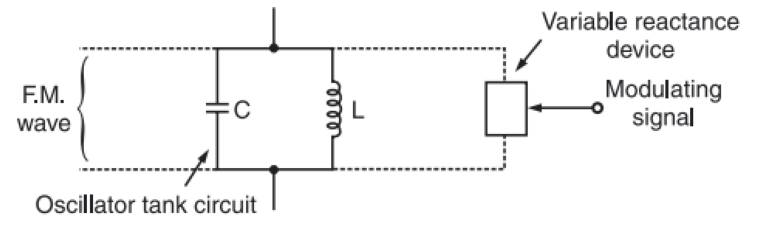

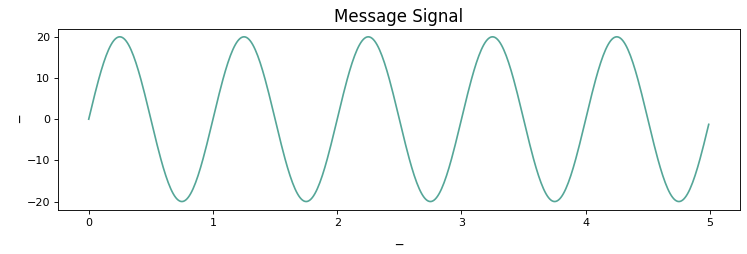

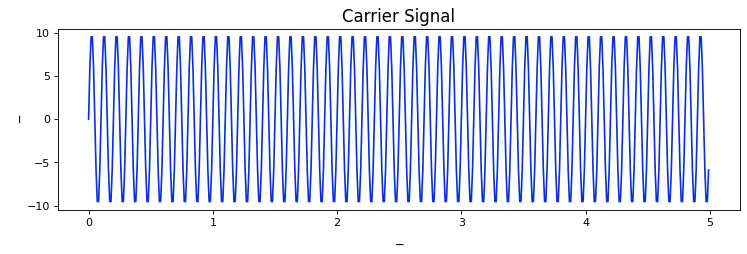

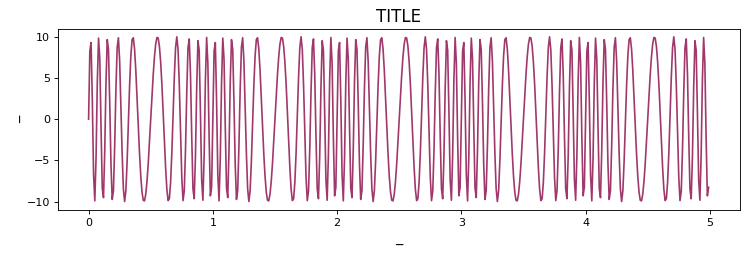

In [92]:
pc=PhaseModulation(message_signal='sin')
pm_using_direct_method=pc.direct_method(L=0.1,C=0.1,k=0.0055)      

# pmd.demod(pm_using_direct_method,pc.get_time())
# pc.plot(pc.get_time(),pm_using_direct_method)                    

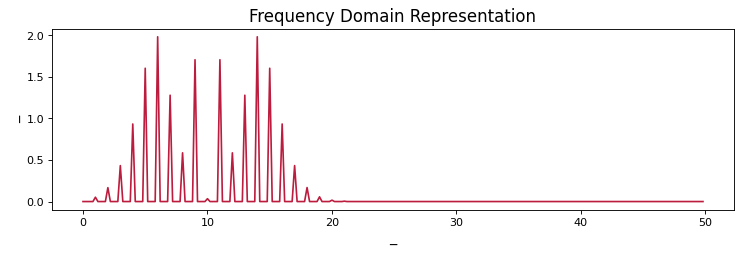

In [52]:
pc.fourier_trainsfrom(pm_using_direct_method)

In [58]:
class AM_Demodulation:
    def __init__(self):
        pass
    def demod(self,signal):
        x=signal
        plt.plot(x)
        plt.title("Signal Before Demoudlation (Before passing into Demodulator)")
        plt.show()
        h=abs(hilbert(x))  
        plt.plot(h)
        plt.title("Signal After Demodulation (After passing through Demodulator)")
        plt.show()
        return h
    def fourier_trainsfrom(self,signal,sampling_frequency=100):
        amplitude=signal
        # Frequency domain representation
        samplingFrequency=sampling_frequency
        
        fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

        fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

        tpCount     = len(amplitude)

        values      = np.arange(int(tpCount/2))

        timePeriod  = tpCount/samplingFrequency

        frequencies = values/timePeriod

        # Frequency domain representation

        self.plot(frequencies, abs(fourierTransform),title="Frequency Domain Representation")

    
    def plot(self,x_value,y_value,title="TITLE",x_value_2=None,y_value_2=None,
            x_label="_",y_label="_"):
        
            figure(num=None, figsize=(11, 3), dpi=80, facecolor='w', edgecolor='k')

            if x_value_2==None and y_value_2==None:

                plt.plot(x_value,y_value,c=np.random.rand(3,))

                plt.title(title,size=15)

                plt.xlabel(x_label,size=13)

                plt.ylabel(y_label,size=13)
#                 plt.axis([0,50,0])
                plt.show()
            else:
                plt.plot(x_value,y_value,color="pink")

                plt.plot(x_value_2,y_value_2,color="b")

                plt.show()

amd=AM_Demodulation()

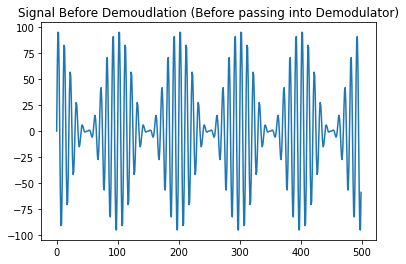

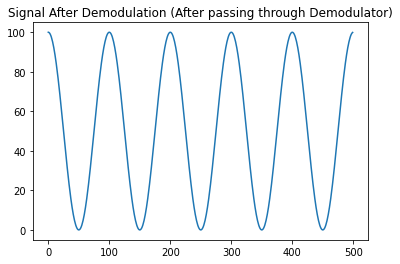

In [59]:
demod_am_ssb_lower=amd.demod(am_using_multiplier)

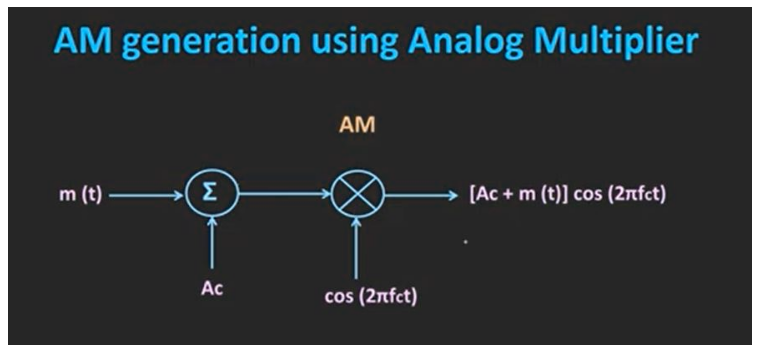

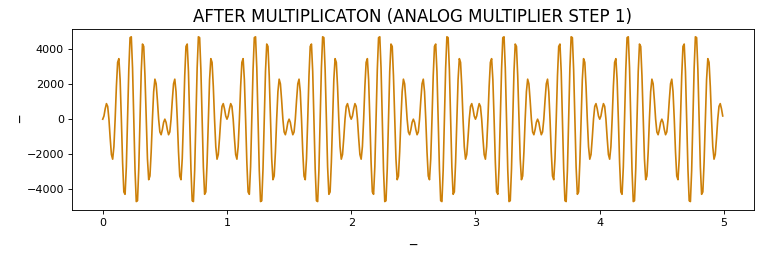

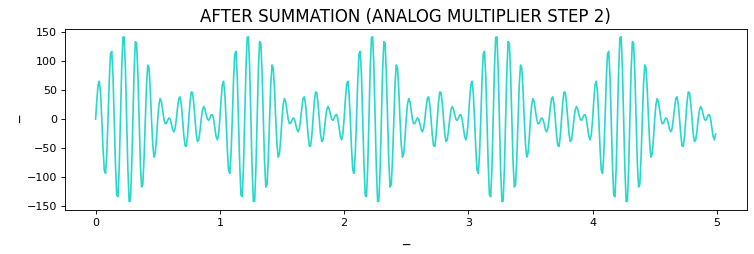

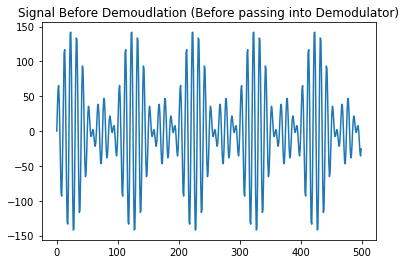

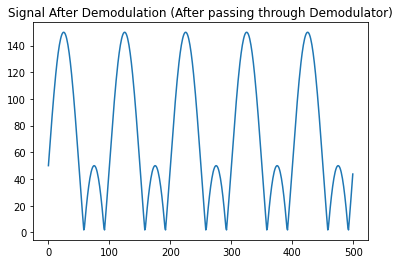

In [62]:
# Why we should not take the value of Amplitude of message >= to carrier signal
ac=Amplitude_Modulation(message_signal='sin',message_amplitude=100)
am_using_multiplier=ac.analog_multiplier()
kk=amd.demod(am_using_multiplier)

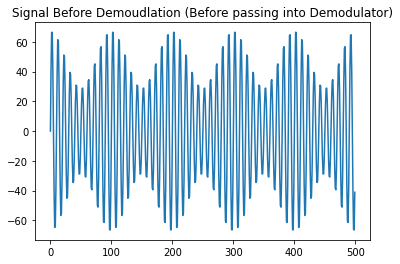

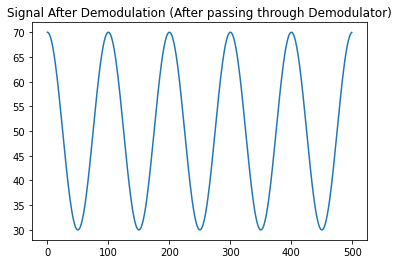

In [63]:
demod_usin_square_law_modulator=amd.demod(am_using_square_law_modulator)

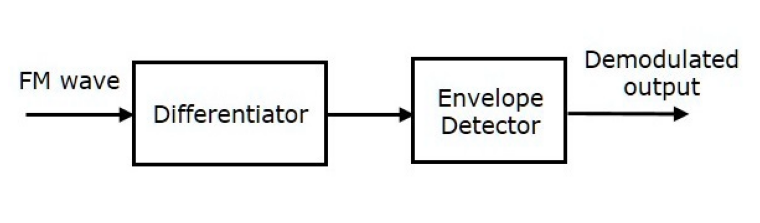

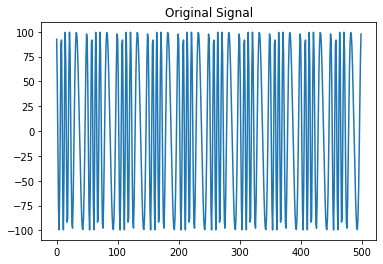

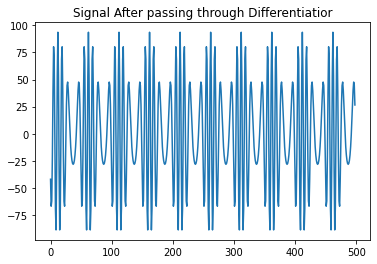

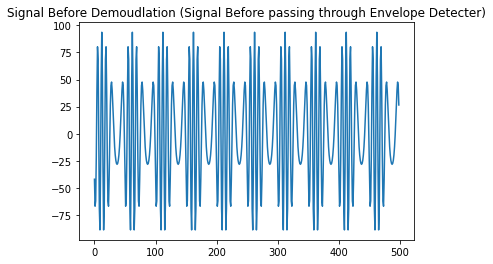

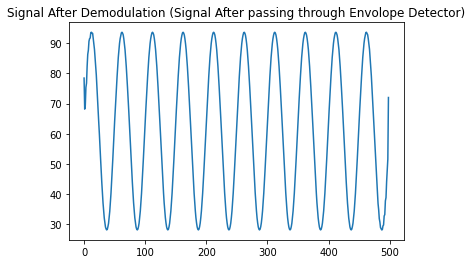

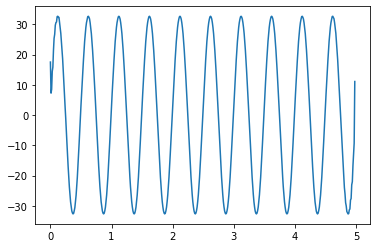

In [66]:
class FM_demod:
    def __init__(self):
        pass
    def envolope_detector(self,signal):
        x=signal
        plt.plot(x)
        plt.title("Signal Before Demoudlation (Signal Before passing through Envelope Detecter)")
        plt.show()
        h=abs(hilbert(x))  
        plt.plot(h)
        plt.title("Signal After Demodulation (Signal After passing through Envolope Detector)")
        plt.show()
        return h
    def demod(self,signal):
        image=cv2.imread(r"./images/fm_demod.jpg")
        figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
        plt.axis("off")
        plt.imshow(image)
        plt.show()

        x=signal*-1
        plt.plot(x)
        plt.title("Original Signal")
        plt.show()
        x=np.diff(x)
        plt.plot(x)
        # x=np.abs(x)
        plt.title("Signal After passing through Differentiatior")
        plt.show()
        output=self.envolope_detector(x)
        
        output=output-(max(output)-min(output))/2-min(output)
        plt.plot(fc.get_time()[:len(fc.get_time())-1],output)
        plt.show()
        return output
 
    def fourier_trainsfrom(self,signal,samplingFrequency=100):
            amplitude=signal
            # Frequency domain representation
#             samplingFrequency=1000/(signal[9]-signal[0])

            fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

            fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

            tpCount     = len(amplitude)

            values      = np.arange(int(tpCount/2))

            timePeriod  = tpCount/samplingFrequency

            frequencies = values/timePeriod

            # Frequency domain representation

            self.plot(abs(frequencies), abs(fourierTransform),title="Frequency Domain Representation")
            
    def plot(self,x_value,y_value,title="TITLE",x_value_2=None,y_value_2=None,
            x_label="_",y_label="_"):
        
            figure(num=None, figsize=(11, 3), dpi=80, facecolor='w', edgecolor='k')

            if x_value_2==None and y_value_2==None:

                plt.plot(x_value,y_value,c=np.random.rand(3,))

                plt.title(title,size=15)

                plt.xlabel(x_label,size=13)

                plt.ylabel(y_label,size=13)

                plt.show()
            else:
                plt.plot(x_value,y_value,color="pink")

                plt.plot(x_value_2,y_value_2,color="b")

                plt.show()
fmd=FM_demod()
k=fmd.demod(fc.modulated_signal)

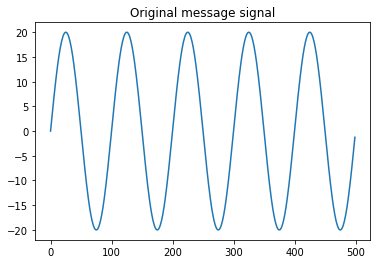

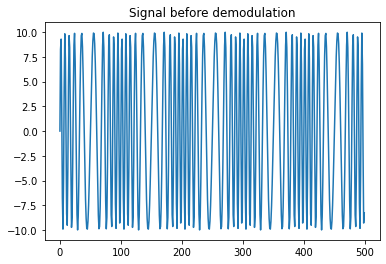

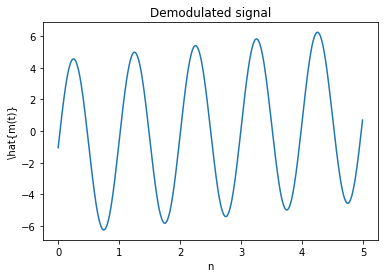

In [76]:
# def pm_modulation(pm_using_direct_method,t):
    
class PM_demod:
    def __init__(self):
        pass
    def envolope_detector(self,signal):
        x=signal
        plt.plot(x)
        plt.title("Signal Before Demoudlation (Signal Before passing through Envelope Detecter)")
        plt.show()
        h=abs(hilbert(x))  
        plt.plot(h)
        plt.title("Signal After Demodulation (Signal After passing through Envolope Detector)")
        plt.show()
        return h
    def demod(self,signal,t,receiverKnowsCarrier=False):
        plt.plot(signal)
        plt.title("Signal before demodulation")
        z= hilbert(signal) #form the analytical signal from the received vector
        inst_phase = np.unwrap(np.angle(z))#instaneous phase

        #If receiver don't know the carrier, estimate the subtraction term
        if receiverKnowsCarrier:
            offsetTerm = 2*3.14*fc*t+beta; #if carrier frequency & phase offset is known
        else:
            p = np.poly1d(np.polyfit(t,inst_phase,1)) #linearly fit the instaneous phase
            estimated = p(t) #re-evaluate the offset term using the fitted values
            offsetTerm = estimated

        demodulated = inst_phase - offsetTerm 

        plt.figure()
        plt.plot(t,demodulated) #demodulated signal
        plt.title('Demodulated signal')
        plt.xlabel('n')
        plt.ylabel('\hat{m(t)}')
 
    def fourier_trainsfrom(self,signal,samplingFrequency=100):
            amplitude=signal
            # Frequency domain representation
#             samplingFrequency=1000/(signal[9]-signal[0])

            fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

            fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

            tpCount     = len(amplitude)

            values      = np.arange(int(tpCount/2))

            timePeriod  = tpCount/samplingFrequency

            frequencies = values/timePeriod

            # Frequency domain representation

            self.plot(abs(frequencies), abs(fourierTransform),title="Frequency Domain Representation")
            
    def plot(self,x_value,y_value,title="TITLE",x_value_2=None,y_value_2=None,
            x_label="_",y_label="_"):
        
            figure(num=None, figsize=(11, 3), dpi=80, facecolor='w', edgecolor='k')

            if x_value_2==None and y_value_2==None:

                plt.plot(x_value,y_value,c=np.random.rand(3,))

                plt.title(title,size=15)

                plt.xlabel(x_label,size=13)

                plt.ylabel(y_label,size=13)

                plt.show()
            else:
                plt.plot(x_value,y_value,color="pink")

                plt.plot(x_value_2,y_value_2,color="b")

                plt.show()
pmd=PM_demod()
plt.plot(pc.message_signal)
plt.title("Original message signal")
plt.show()
k=pmd.demod(pc.modulated_signal,pc.get_time())
plt.show()

In [444]:
# import numpy as np
# from scipy.signal import hilbert
# import matplotlib.pyplot as plt
# PI = np.pi

# fc = 240 #carrier frequency
# fm = 10 #frequency of modulating signal
# alpha = 1 #amplitude of modulating signal
# theta = PI/4 #phase offset of modulating signal
# beta = PI/5 #constant carrier phase offset 
# receiverKnowsCarrier= False; #If receiver knows the carrier frequency & phase offset

# fs = 8*fc #sampling frequency
# duration = 0.5 #duration of the signal
# t = np.arange(int(fs*duration)) / fs #time base

# #Phase Modulation
# m_t = alpha*np.sin(2*PI*fm*t + theta) #modulating signal
# x = np.cos(2*PI*fc*t + beta + m_t ) #modulated signal

# plt.figure()
# plt.subplot(2,1,1)
# plt.plot(t,m_t) #plot modulating signal
# plt.title('Modulating signal')
# plt.xlabel('t')
# plt.ylabel('m(t)')
# plt.subplot(2,1,2)
# plt.plot(t,x) #plot modulated signal
# plt.title('Modulated signal')
# plt.xlabel('t')
# plt.ylabel('x(t)')

# #Add AWGN noise to the transmitted signal
# nMean = 0 #noise mean
# nSigma = 0.1 #noise sigma
# n = np.random.normal(nMean, nSigma, len(t))
# r = x + n  #noisy received signal

# #Demodulation of the noisy Phase Modulated signal
